In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import json
import sys
import os
import time
import numpy as np
import cv2
import onnx
import onnxruntime
from onnx import numpy_helper

In [35]:
model_dir ="Digits"
model="model.onnx"
path=sys.argv[1]

In [8]:
files = [f for f in os.listdir('.') if os.path.isfile(f)]
for f in files:
    print(f)

img_3.jpg
model.onnx
Test_MNIST_1.ipynb
TEST_MNIST_2.ipynb


Inlezen afbeelding en omzetten naar een 28x28 array in grayscale.

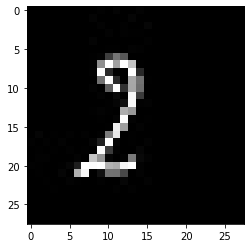

In [59]:
#Preprocess the image
img = cv2.imread(f"{model_dir}/digit_5.jpg")
imgplot = plt.imshow(img)
plt.show()

In [60]:
img = np.dot(img[...,:3], [0.299, 0.587, 0.114])
img = cv2.resize(img, dsize=(28, 28), interpolation=cv2.INTER_AREA)
img.resize((1, 1, 28, 28))
#imgplot = plt.imshow(img)
#plt.show()

Afbeelding naar numpy array van type float32

In [61]:
data = json.dumps({'data': img.tolist()})
data = np.array(json.loads(data)['data']).astype('float32')

Data aan model geven voor interference.

In [62]:
data = json.dumps({'data': img.tolist()})
data = np.array(json.loads(data)['data']).astype('float32')
session = onnxruntime.InferenceSession(model, None)
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name
print(input_name)
print(output_name)

Input3
Plus214_Output_0


In [63]:
result = session.run([output_name], {input_name: data})
prediction=int(np.argmax(np.array(result).squeeze(), axis=0))
print(prediction)

2


In [64]:
print(np.array(result).squeeze())

[ 4.2750336e+02  2.9196637e+02  1.5649940e+03 -4.5983096e+02
 -8.0361981e+02 -4.6489709e+02 -2.0914805e+03 -7.3597076e+02
  8.6337610e+02  4.6279982e-01]
